You are given an $m \times n$ $\textit{grid}$ where each cell can have one of three values:
- $0$ representing an empty cell
- $1$ representing a fresh orange
- $2$ representing a rotten orange

Every minute, any fresh orange that is **4-directionally** adjacent to a rotten orange becomes rotten.

Return the minimum number of minutes that must elapse until no cell has a fresh orange. If this is impossible, return $-1$.


*Example 1*

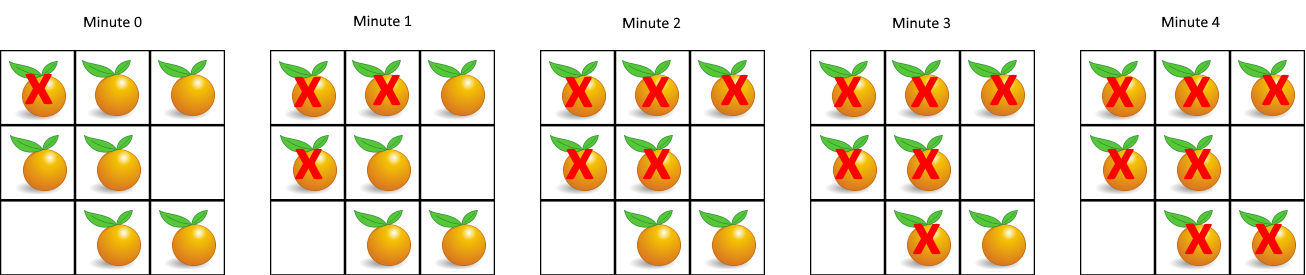
$\textit{grid}$ = [[2,1,1],[1,1,0],[0,1,1]]<br />
Returns 4

*Example 2*
$\textit{grid}$ = [[2,1,1],[0,1,1],[1,0,1]]<br />
Returns -1. The orange in the bottom left corner (row $2$, column $0$) is never rotten, because rotting only happens 4-directionally.

*Example 3*
$\textit{grid}$ = [[0,2]]<br />
Returns 0. Since there are already no fresh oranges at minute $0$, the answer is just $0$.


*Code*

In [50]:
def oranges_rotting(grid):
    rows, cols = len(grid), len(grid[0])
    rotten = []
    fresh = 0
    for row in range(rows):
        for col in range(cols):
            if grid[row][col] == 1:
                fresh += 1
            if grid[row][col] == 2:
                rotten.append((row, col))
    minutes = 0
    while rotten and fresh > 0:
        minutes += 1
        for _ in range(len(rotten)):
            row, col = rotten.pop(0)
            for row_adj, col_adj in [(1,0), (-1,0), (0,1), (0,-1)]:
                cur_row, cur_col = row + row_adj, col + col_adj
                if cur_row < 0 or cur_row == rows or cur_col < 0 or cur_col == cols:
                    continue
                cell = grid[cur_row][cur_col]
                if cell == 0 or cell == 2:
                    continue
                fresh -= 1
                grid[cur_row][cur_col] = 2
                rotten.append((cur_row, cur_col))
    return minutes if fresh == 0 else -1

In [51]:
grid = [[2,1,1],[1,1,0],[0,1,1]]
print(oranges_rotting(grid))  # exp 4

4


In [52]:
grid = [[0, 1, 1], [1, 1, 1], [2, 1, 1]]
print(oranges_rotting(grid))  # exp 4

4


In [53]:
grid = [[2,1,1],[0,1,1],[1,0,1]]
print(oranges_rotting(grid))  # exp -1

-1


In [54]:
grid = [[0, 2]]
print(oranges_rotting(grid))  # exp 0

0
